<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week9_Hist_sst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

The application of linear trend on climate data: Trend

In [2]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)

# select period
#ds = ds.sel(time=slice('1960', '2020'))
#ds

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2030, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-03-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [3]:
print(ds['time'])

<xarray.DataArray 'time' (time: 2030)>
array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ..., '2022-12-01T00:00:00.000000000',
       '2023-01-01T00:00:00.000000000', '2023-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-02-01
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 81480.]
    _ChunkSizes:      1


In [4]:
#select month 
ds = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 4, 11, 12])) #winter half year
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1016, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-03-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [5]:
#select domain
dsdo = ds.sel(lat=slice(5, -5), lon=slice(120, 180))
dsdo_mean = dsdo.mean(dim=('lon', 'lat'))
dsdo_mean

<xarray.Dataset>
Dimensions:    (time: 1016, nbnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time) float32 28.75 28.68 28.82 29.1 ... 29.73 29.64 29.3 29.09

In [6]:
#select period
dsdo_early = dsdo_mean.sel(time=slice('1900', '1950'))
dsdo_later = dsdo_mean.sel(time=slice('1960', '2020'))

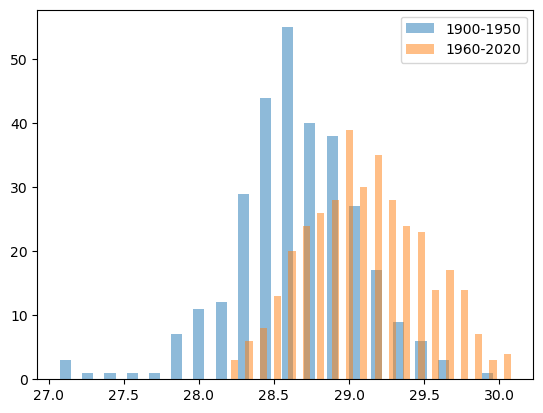

In [7]:
## first plot the averages for the first 10 years in blue


plt.hist(dsdo_early['sst'], bins = 20, histtype = 'bar',density = False, alpha = 0.5, rwidth = 0.5, label = "1900-1950")
plt.hist(dsdo_later['sst'], bins = 20, histtype = 'bar',density = False, alpha = 0.5, rwidth = 0.5, label = "1960-2020")


## then add a legend
plt.legend()